# Setup

In [1]:
# import libraries
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 for all logs, 2 for errors only
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad, Adadelta, SGD, Nadam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau


import numpy as np
import matplotlib.pyplot as plt
import json
import statistics

## structure data as needed

In [2]:
# import database
mnist = keras.datasets.mnist

In [3]:
# load the digits and the labels from the library that stores the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# look at the shape of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.max())
print(y_train.max())
print(x_test.max())
print(y_test.max())

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
255
9
255
9


In [4]:
# split 'train' into 'train' and 'validation'
v_size = 8000 # train set will be 8000 out of 60,000

x_tr, y_tr = x_train[0:-v_size], y_train[0:-v_size]
x_va, y_va = x_train[-v_size:], y_train[-v_size:]

# change form of output from e.g. [3] to [0 0 0 1 0 0 0 0 0 0]
# (change the y of each set)
y_tr2 = tf.keras.utils.to_categorical(y_tr, 10)
y_va2 = tf.keras.utils.to_categorical(y_va, 10)
y_test2 = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# normalise input to take values between 0 and 1
x_tr = x_tr/x_train.max()
x_va = x_va/x_train.max() # use train max as no validation max
x_test = x_test/x_train.max() # train max and test max are equal

## Look at dataset

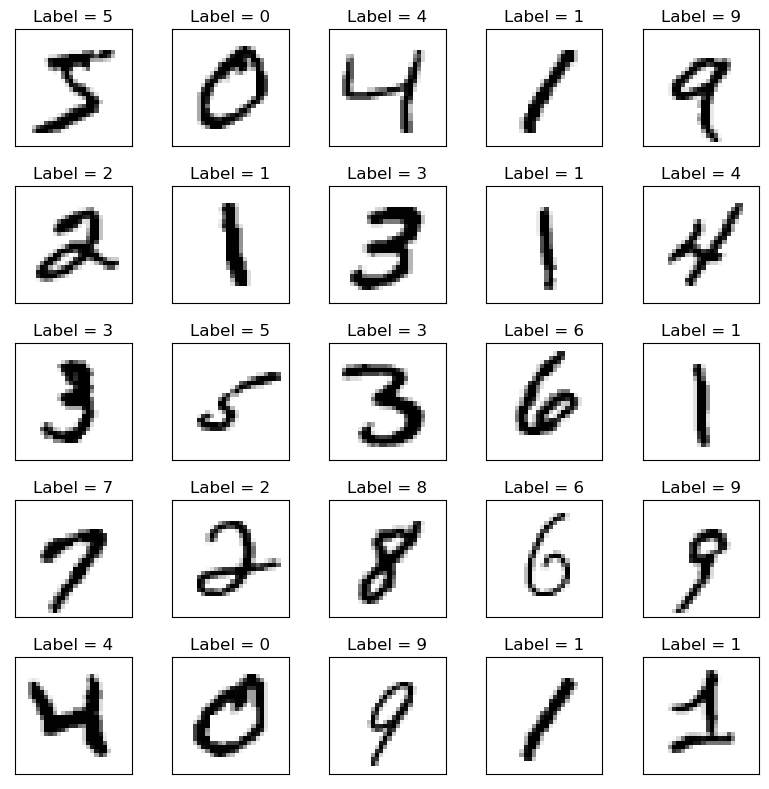

In [28]:
fig, ax=plt.subplots(5, 5, figsize = (8, 8))

for i in range(5):
    for j in range(5):
        ax[i,j].imshow(x_train[5*i+j], cmap=plt.cm.binary)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title('Label = ' + str(y_train[5*i+j]))
plt.tight_layout()
plt.savefig('MNIST_input_data')
plt.show()

# Neural Network

## create neural network structure

#### best value so far
0.9855999946594238
<br>
params: l2_n256_do0.5_rlrop0.0003_e20_bs32

In [87]:
neurons_per_layer = 512
learning_rate = 0.001
batch_size = 128
epochs = 10
dropout_rate = 0.6
num_layers = 1

factor = 0.2
patience = 1
min_lr = 0.00001
verbose = 1

In [88]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor,
                              patience=patience, min_lr=min_lr, verbose=verbose)

In [89]:
def create_model(num_layers, neurons_per_layer, dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    for count in range(num_layers):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(10, activation='softmax'))
    
    return model

In [90]:
custom_model = create_model(num_layers, neurons_per_layer, dropout_rate)
custom_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

## training the model

In [91]:
fitting_output = custom_model.fit(x_tr, y_tr2, epochs = epochs, batch_size=batch_size, validation_data=(x_va, y_va2), callbacks=[reduce_lr])

Epoch 1/10
407/407 [==============================] - 2s 4ms/step - loss: 0.3901 - accuracy: 0.8844 - val_loss: 0.1621 - val_accuracy: 0.9561 - lr: 0.0010
Epoch 2/10
407/407 [==============================] - 1s 4ms/step - loss: 0.1938 - accuracy: 0.9439 - val_loss: 0.1157 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 3/10
407/407 [==============================] - 2s 5ms/step - loss: 0.1476 - accuracy: 0.9569 - val_loss: 0.0953 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 4/10
407/407 [==============================] - 2s 4ms/step - loss: 0.1245 - accuracy: 0.9636 - val_loss: 0.0832 - val_accuracy: 0.9749 - lr: 0.0010
Epoch 5/10
395/407 [============================>.] - ETA: 0s - loss: 0.1045 - accuracy: 0.9684
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
407/407 [==============================] - 1s 4ms/step - loss: 0.1048 - accuracy: 0.9682 - val_loss: 0.0832 - val_accuracy: 0.9745 - lr: 0.0010
Epoch 6/10
407/407 [==============================] - 1s 4ms/st

In [92]:
training_history = fitting_output.history

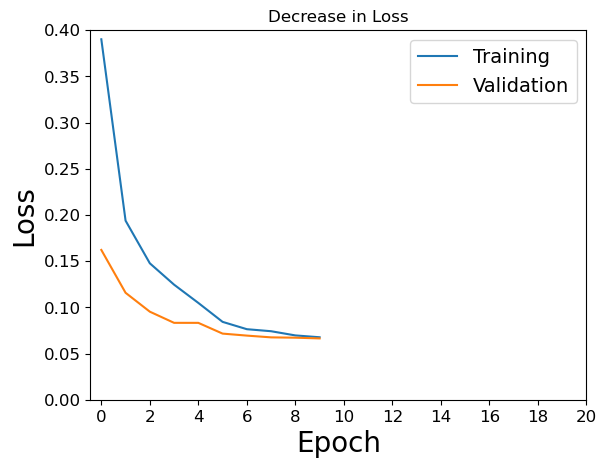

In [93]:
# plotting the decrease in loss as the network learns
fig_loss = plt.figure()
ax = fig_loss.add_subplot(111)
ax.plot(fitting_output.history['loss'], label='Training')
ax.plot(fitting_output.history['val_loss'], label='Validation')
ax.set_title('Decrease in Loss')
ax.set_ylabel('Loss', fontsize=20)
ax.set_xlabel('Epoch', fontsize=20)
ax.legend(loc='upper right', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)
ax.set_xticks(np.arange(0, 22, 2))
ax.set_ylim(0, 0.4)
plt.show()

## testing the model

In [94]:
# use the test set
predictions = custom_model.predict(x_test)
print(predictions.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 10)


In [95]:
x_test.shape

(10000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

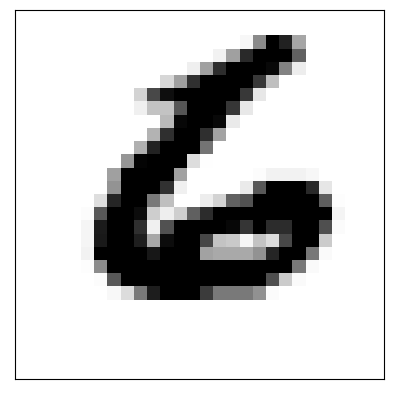

In [96]:
# to see the guesses set i to be a number between 0 and 9999

i = 9999
fig, ax=plt.subplots()
ax.imshow(x_test[i], cmap=plt.cm.binary)
ax.set_xticks([])
ax.set_yticks([])
plt.show

In [38]:
np.set_printoptions(threshold = np.inf)
predictions

array([[2.39775734e-12, 2.39145348e-09, 2.54491709e-07, 1.94410723e-06,
        5.82722781e-13, 5.80071158e-10, 9.32259814e-17, 9.99997675e-01,
        2.72492549e-11, 1.39305740e-07],
       [2.22802748e-11, 2.64985119e-05, 9.99972880e-01, 5.96269388e-07,
        3.17743770e-13, 3.14993691e-11, 3.41551544e-11, 4.34335812e-09,
        6.83508139e-09, 1.45363083e-16],
       [2.57274735e-08, 9.99946296e-01, 2.46619879e-06, 1.26958895e-07,
        1.99588840e-06, 5.06170409e-07, 7.20553658e-07, 3.66186869e-05,
        1.11654181e-05, 4.05899563e-08],
       [9.99970376e-01, 2.11293405e-09, 6.32194133e-06, 1.63567123e-07,
        4.27291980e-07, 6.38683446e-07, 1.66836471e-05, 1.18355160e-06,
        1.18314247e-07, 3.87897353e-06],
       [3.14274672e-07, 4.58655087e-08, 5.05881530e-07, 1.21914114e-08,
        9.99641538e-01, 9.84044277e-08, 1.19026566e-07, 5.60313174e-06,
        4.12407317e-08, 3.51791939e-04],
       [1.18787813e-10, 9.99993622e-01, 5.78163695e-09, 2.15980966e-09,
   

In [58]:
for i in tmp:
    print(max(i))

0.9999977
0.9999729
0.9999463
0.9999704


In [65]:
tmp_l = []
for i in predictions:
    tmp_l.append(max(i))

In [70]:
sum(tmp_l)/len(tmp_l)

0.9872229699730873

In [86]:
np.save('/Users/nadinecallan/Desktop/array',predictions)

In [76]:
max_list = [max(i) for i in predictions]
max_list

[0.9999977,
 0.9999729,
 0.9999463,
 0.9999704,
 0.99964154,
 0.9999936,
 0.9998596,
 0.99931985,
 0.82949203,
 0.9999289,
 0.9999954,
 0.9985813,
 0.99995106,
 0.9999984,
 0.99999946,
 0.9995716,
 0.99989575,
 0.99999803,
 0.927911,
 0.99999875,
 0.9959868,
 0.9995623,
 0.9999688,
 0.99999994,
 0.99952,
 0.9999977,
 0.9999977,
 0.99999934,
 0.999999,
 0.99995273,
 0.99999994,
 0.99991804,
 0.99999994,
 0.99733657,
 0.9999915,
 0.99993795,
 0.99998873,
 0.9999942,
 0.9973606,
 0.999994,
 0.9999419,
 0.9999011,
 0.9999942,
 0.9994558,
 0.9999382,
 0.99993104,
 0.9996312,
 0.99999803,
 0.9999997,
 0.9999762,
 0.99997824,
 0.9999985,
 0.99999887,
 0.9999036,
 0.9999986,
 0.9999357,
 0.99999946,
 0.99999005,
 0.9999568,
 0.999625,
 0.99999994,
 0.9824561,
 0.99538034,
 0.9997387,
 0.99999386,
 0.998515,
 0.99465907,
 0.9999952,
 0.99999994,
 0.9999916,
 0.99999994,
 0.9999998,
 0.99816513,
 0.9702356,
 0.99998754,
 0.99998885,
 0.99999946,
 0.99746233,
 0.9977197,
 0.9999829,
 0.999502,
 0

In [84]:
print(statistics.stdev(max_list))

AssertionError: 

In [99]:
mean = sum([max(i) for i in predictions])/len(predictions)
mean

0.9791641274780035

In [100]:
predictions[i][np.argmax(predictions[i])]

0.9999977

In [72]:
predictions[2]

array([2.5727473e-08, 9.9994630e-01, 2.4661988e-06, 1.2695889e-07,
       1.9958884e-06, 5.0617041e-07, 7.2055366e-07, 3.6618687e-05,
       1.1165418e-05, 4.0589956e-08], dtype=float32)

In [97]:
print('The probability array for the first test image is\n', predictions[i], '\nfor the first test image.\n')
print('The most likely answer is %d which has a probability of %.4lf' % 
      (np.argmax(predictions[i]), predictions[i][np.argmax(predictions[i])] ))

The probability array for the first test image is
 [1.1079698e-07 2.3449681e-11 3.5204494e-07 8.0984536e-10 5.3226239e-07
 1.3384739e-06 9.9999768e-01 4.9134455e-12 2.5834459e-09 6.3417627e-10] 
for the first test image.

The most likely answer is 6 which has a probability of 1.0000


#### best value so far
0.9855999946594238
<br>
params: l2_n256_do0.5_rlrop0.0003_e20_bs32

In [17]:
# evaluate the accuracy of the entire set
evaluation_results = custom_model.evaluate(x_test, y_test2, verbose=0)
print(evaluation_results)

[0.07419513911008835, 0.9779999852180481]


In [112]:
# # saving the data

# run = f'l{num_layers}_n{neurons_per_layer}_do{dropout_rate}_rlrop{learning_rate}_e{epochs}_bs{batch_size}_f{factor}_p{patience}_mlr{min_lr}_v{verbose}'

# data_folder_name = 'dict_output_data'
# plots_folder_name = 'plots_of_output_data'
# data_file_name = f'{run}.json'
# # evaluation_filename = 'evaluation_results'
# plots_file_name = f'{run}.png'


# # Specify the folder path where you want to save the JSON file
# data_folder_path = f'output_data/{data_folder_name}'
# plots_folder_path = f'output_data/{plots_folder_name}'

# # Ensure the folder exists, create it if necessary
# os.makedirs(data_folder_path, exist_ok=True)
# os.makedirs(plots_folder_path, exist_ok=True)

# # Concatenate the folder path with the file name
# data_file_path = os.path.join(data_folder_path, data_file_name)
# plots_file_path = os.path.join(plots_folder_path, plots_file_name)

# # Prepare the output data as a dictionary
# output_dict = {
#     "loss": training_history['loss'],
#     "accuracy": training_history['accuracy'],
#     "val_loss": training_history['val_loss'],
#     "val_accuracy": training_history['val_accuracy']
# }

# # Prepare the evaluation results as a dictionary
# evaluation_dict = {
#     "test_loss": evaluation_results[0],
#     "test_accuracy": evaluation_results[1]
# }

# merged_dict = {**output_dict, **evaluation_dict}

# # Save the data
# with open(data_file_path, 'w') as file:
#     json.dump(merged_dict, file)
    
# fig_loss.savefig(plots_file_path)
# plt.show()

# print(run)

l2_n128_do0.3_rlrop0.0003_e20_bs32_f0.2_p2_mlr1e-05_v1
